# Mandatory Assignment 1

This is the second of three mandatory assignments which must be completed during the course. Note that you only need to pass 2 out of 3 assignments to be eligible for the exam.


First some practical information:

* When is the assignment due?: **23:59, Friday, August 14, 2020.**
* Should i work with my group?: **Yes**. In particular, you should **only hand in 1 assignment per group**.

The assignment consists of problems from some of the exercise sets that you have solved so far. Some exercises are modified a little to better suit the structure of the assignment. 

**Note**: It is important that you submit your edited version of THIS [notebook](https://fileinfo.com/extension/ipynb#:~:text=An%20IPYNB%20file%20is%20a,Python%20language%20and%20their%20data.) as a .ipynb file and nothing else. Do not copy your answers into another notebook that you have made. Do not submit your answers as a pdf. Do not convert the notebook to json and then submit that etc. :) 

## Problems from Exercise Set 3:

> **Ex. 3.2.1:**: Show the first five rows of the titanic dataset. What information is in the dataset? Use a barplot to show the probability of survival for men and women within each passenger class. Can you make a boxplot showing the same information (why/why not?). Write _three sentences_ for this question. 
>
> > _Hint:_ https://seaborn.pydata.org/generated/seaborn.barplot.html, specifically the `hue` option.

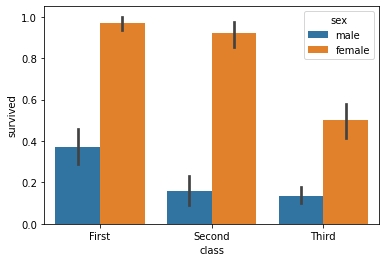

In [1]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns 

%matplotlib inline 

iris = sns.load_dataset('iris')
tips = sns.load_dataset('tips')
titanic = sns.load_dataset('titanic')

ax1=sns.barplot(x='class', y='survived', hue='sex', data=titanic)

# No,there can not be made a boxplot over these data
# Due to the fast fact that this type of data is one and zeros.
# A boxplot need more information in order to give a usefull output!

> **Ex. 3.2.2:** Using the iris flower dataset, draw a scatterplot of sepal length and petal length. Include a second order polynomial fitted to the data. Add a title to the plot and rename the axis labels to `sepal length` and `sepal width`.
> _Write 3 sentences:_ Is this a meaningful way to display the data? What could we do differently?
>
> For a better understanding of the dataset this image might be useful:
> <img src="iris_pic.png" alt="Drawing" style="width: 200px;"/>
>
>> _Hint:_ use the `.regplot` method from seaborn. 

Text(0, 0.5, 'sepal length')

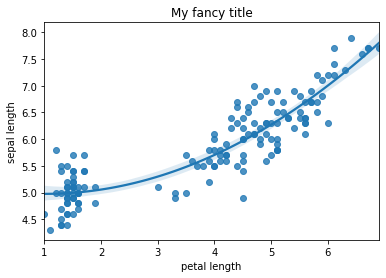

In [2]:
# YOUR CODE HERE

ax2 = sns.regplot(x='petal_length',
                  y='sepal_length',
                  data=iris, order=2)

plt.title('My fancy title')
plt.xlabel('petal length')
plt.ylabel('sepal length')

# We can use very little information from this plot
# It makes it hard to deduce something meaningful form this as the data is not homogeneous
# We could try dividing the 3 different species of iris and see if that gives more meaning
# From 3.2.4 we can due to the colors see that it actually could be a good idea to divide the 3 different species of iris


> **Ex. 3.2.3:** Combine the two of the figures you created above into a two-panel figure similar to the one shown here:
> <img src="Example.png" alt="Drawing" style="width: 600px;"/>
>
> Save the figure as a png file in this on your computer named `two_plots.png`. 
>> _Hint:_ See [this question](https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot) on stackoverflow for inspiration.

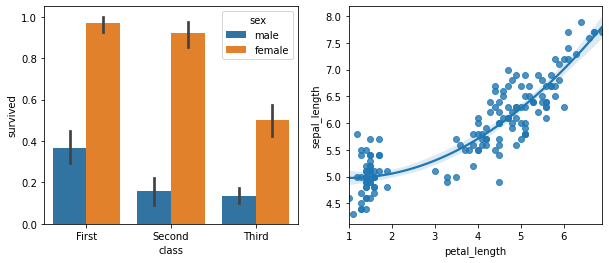

In [3]:
# YOUR CODE HERE
f, axes= plt.subplots(1, 2, figsize=(10, 4))

ax1=sns.barplot(x='class', 
                y='survived', 
                hue='sex', 
                data=titanic, 
                ax=axes[0])

ax2 = sns.regplot(x='petal_length', 
                  y='sepal_length', 
                  data=iris, 
                  order=2,
                  ax=axes[1])


plt.savefig('two_plots.png')

> **Ex. 3.2.4:** Use [pairplot with hue](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a figure that clearly shows how the different species vary across measurements. Change the color palette and remove the shading from the density plots

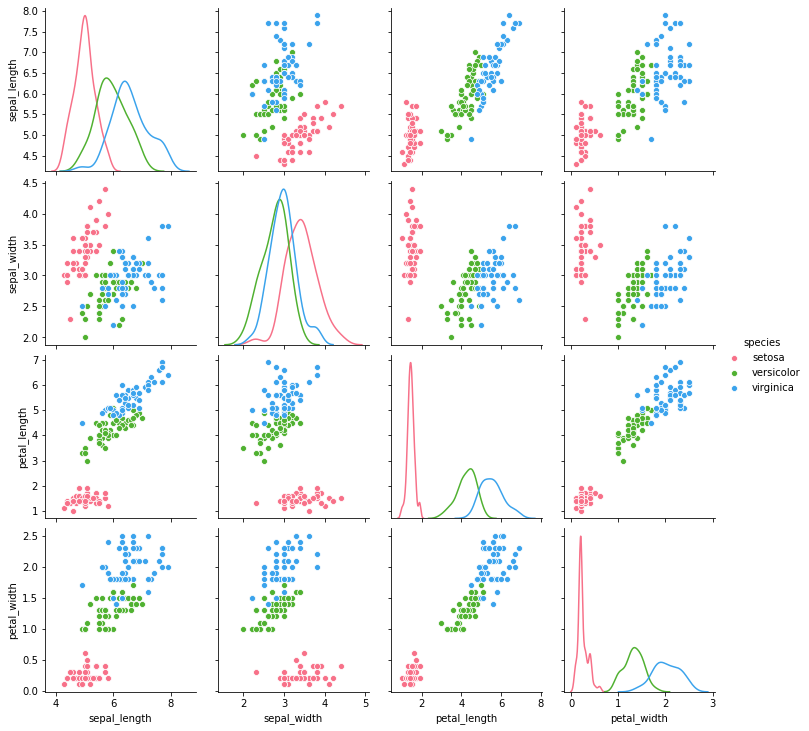

In [4]:
# YOUR CODE HERE
sns.pairplot(iris,
             hue="species", 
             palette="husl", 
             diag_kws=dict(shade=False))

## Problems from Exercise Set 4:

We continue with the exercise that analyzes NOAA data. This time we are going to **read the weather data from a csv file** located in this assignment directory instead of trying to request the website. The file is called `'weather_data_1870-1875.csv'` and consists of weather data for the period 1870-1875. Specifically, the csv file contains a dataframe which has been constructed by concatenating the _non-processed_ data from 1870-1875.

> **Ex. 4.1.1:** The code below runs through some of the steps we completed in exercise 4.1.1 in Module 4. As we are not going to request the website but load the data from a csv file your task is to **rewrite parts of the function**. Rename the function to `process_weather` instead of `load_weather`. The function should now  take a `dataframe` as input. The function should still run through the same processing steps although you should consider whether `df_weather.iloc[:, :4]` is necessary for the weather data loaded from  the csv file. The doc string should also be rewritten. After having rewritten the function, load the weather data from `'weather_data_1870-1875.csv'` into a pandas dataframe, apply the `load_weather` function  to this dataframe and store the result in the variable `df_weather_period`.   

```python
import pandas as pd

def load_weather(year):
    
    '''
    This functions loads the data for selected year and then structures and cleans it.
    - Structuring includes removing unused columns, renaming and selecting only observations 
    of maximum temperature. 
    - Cleaning includes inserting missing decimal, sorting and resetting index.
    '''
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"
    
    # loads the data
    df_weather = pd.read_csv(url, header=None)\
                    .iloc[:,:4] 
    
    # structure and clean data using methods chaining
    # note that the original columns now are strings when loading the csv file
    # and not integers as when downloading the data
    df_out = \
        df_weather\
            .rename(columns={'0': 'station', '1': 'datetime', '2': 'obs_type', '3': 'obs_value'})\
            .query("obs_type == 'TMAX'")\
            .assign(obs_value=lambda df: df['obs_value']/10)\
            .sort_values(by=['station', 'datetime'])\
            .reset_index(drop=True)\
            .copy() 

    # area process
    df_out['area'] = df_out['station'].str[0:2]
    
    # datetime process
    df_out['datetime_dt'] = pd.to_datetime(df_out['datetime'], format = '%Y%m%d')
    df_out['month'] = df_out['datetime_dt'].dt.month
    df_out['year'] = df_out['datetime_dt'].dt.year
    
    return df_out
```

In [5]:
# YOUR CODE HERE
import pandas as pd

def process_weather(dataframe):

    '''
    This functions loads the data for selected year and then structures and cleans it.
    - Structuring includes removing unused columns, renaming and selecting only observations 
    of maximum temperature. 
    - Cleaning includes inserting missing decimal, sorting and resetting index.
    '''
    # loads the data
    df_weather = dataframe

    # structure and clean data using methods chaining
    # note that the original columns now are strings when loading the csv file
    # and not integers as when downloading the data

    df_out = \
        df_weather\
            .rename(columns={'0': 'station', '1': 'datetime', '2': 'obs_type', '3': 'obs_value'})\
            .query("obs_type == 'TMAX'")\
            .assign(obs_value=lambda df: df['obs_value']/10)\
            .sort_values(by=['station', 'datetime'])\
            .reset_index(drop=True)\
            .copy() 

    # area process
    df_out['area'] = df_out['station'].str[0:2]

    # datetime process
    df_out['datetime_dt'] = pd.to_datetime(df_out['datetime'], format = '%Y%m%d')
    df_out['month'] = df_out['datetime_dt'].dt.month
    df_out['year'] = df_out['datetime_dt'].dt.year

    return df_out

df_weather_period = process_weather(pd.read_csv('weather_data_1870-1875.csv'))

df_weather_period

,station,datetime,obs_type,obs_value,area,datetime_dt,month,year
0,ASN00048013,18710425,TMAX,26.7,AS,1871-04-25,4,1871
1,ASN00048013,18710426,TMAX,26.8,AS,1871-04-26,4,1871
2,ASN00048013,18710427,TMAX,25.6,AS,1871-04-27,4,1871
3,ASN00048013,18710428,TMAX,25.6,AS,1871-04-28,4,1871
4,ASN00048013,18710429,TMAX,23.3,AS,1871-04-29,4,1871
...,...,...,...,...,...,...,...,...
132312,USW00094728,18751227,TMAX,10.6,US,1875-12-27,12,1875
132313,USW00094728,18751228,TMAX,1.1,US,1875-12-28,12,1875
132314,USW00094728,18751229,TMAX,2.8,US,1875-12-29,12,1875
132315,USW00094728,18751230,TMAX,6.7,US,1875-12-30,12,1875


In [6]:
assert any(df_weather_period.station == process_weather(pd.read_csv('weather_data_1870-1875.csv')).station)
assert any(df_weather_period.columns.values == ['station', 'datetime', 'obs_type', 'area', 
                                                'obs_value', 'datetime_dt', 'month', 'year'])
assert len(df_weather_period) == 132317
assert round(df_weather_period.obs_value.mean()) == 14

> **Ex. 4.1.1.1 (Not seen in module 4):** Try to plot the observations value of `df_weather_period` by running `df_weather_period.obs_value.plot()`. Something seems off, right? Now try to inspect the problematic subset of the dataframe by running `df_weather_period[df_weather_period.obs_value < -50]`. What can these observations be characterized as? Drop these three observations from `df_weather_period`, reset the index and drop the column with the old index. Store the dataframe back into the variable `df_weather_period`.

,station,datetime,obs_type,obs_value,area,datetime_dt,month,year
0,ASN00048013,18710425,TMAX,26.7,AS,1871-04-25,4,1871
1,ASN00048013,18710426,TMAX,26.8,AS,1871-04-26,4,1871
2,ASN00048013,18710427,TMAX,25.6,AS,1871-04-27,4,1871
3,ASN00048013,18710428,TMAX,25.6,AS,1871-04-28,4,1871
4,ASN00048013,18710429,TMAX,23.3,AS,1871-04-29,4,1871
...,...,...,...,...,...,...,...,...
132309,USW00094728,18751227,TMAX,10.6,US,1875-12-27,12,1875
132310,USW00094728,18751228,TMAX,1.1,US,1875-12-28,12,1875
132311,USW00094728,18751229,TMAX,2.8,US,1875-12-29,12,1875
132312,USW00094728,18751230,TMAX,6.7,US,1875-12-30,12,1875


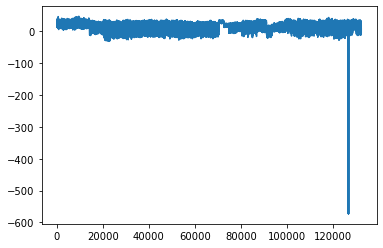

In [7]:
# YOUR CODE HERE
df_weather_period.obs_value.plot()

df_weather_period[df_weather_period.obs_value < -50]

df_weather_period = df_weather_period.drop([126738, 126739, 126770])\
                    .reset_index()\
                    .drop('index', axis=1)
df_weather_period

In [8]:
assert len(df_weather_period[df_weather_period.obs_value < -50]) == 0 

> **Ex. 4.1.3:** 
Continuing with the `df_weather_period` from last exercise, convert the `area` column to a categorical variable. 
Transform the `obs_value` column from a continuous to a categorical variable by partitioning it into `3` intervals. Call this new column for `obs_value_cat`.  This can be done using the `pd.cut()` method of pandas. 
Make another column with  `obs_value` as a categorical variable but this time label the 3 intervals as `["cold", "medium", "hot"]`. This can be done by specifying the `labels` parameter in the `pd.cut()` method of pandas. Call this new column for `obs_value_cat_labeled`.

In [9]:
# YOUR CODE HERE
df_weather_period.area.astype('category')

df_weather_period['obs_value_cat'] = pd.cut(df_weather_period['obs_value'], bins = 3).astype('category')

df_weather_period['obs_value_cat_labeled'] = \
pd.cut(df_weather_period['obs_value'], bins = 3, labels=["cold", "medium", "hot"]).astype('category')

df_weather_period

,station,datetime,obs_type,obs_value,area,datetime_dt,month,year,obs_value_cat,obs_value_cat_labeled
0,ASN00048013,18710425,TMAX,26.7,AS,1871-04-25,4,1871,"(21.5, 47.8]",hot
1,ASN00048013,18710426,TMAX,26.8,AS,1871-04-26,4,1871,"(21.5, 47.8]",hot
2,ASN00048013,18710427,TMAX,25.6,AS,1871-04-27,4,1871,"(21.5, 47.8]",hot
3,ASN00048013,18710428,TMAX,25.6,AS,1871-04-28,4,1871,"(21.5, 47.8]",hot
4,ASN00048013,18710429,TMAX,23.3,AS,1871-04-29,4,1871,"(21.5, 47.8]",hot
...,...,...,...,...,...,...,...,...,...,...
132309,USW00094728,18751227,TMAX,10.6,US,1875-12-27,12,1875,"(-4.8, 21.5]",medium
132310,USW00094728,18751228,TMAX,1.1,US,1875-12-28,12,1875,"(-4.8, 21.5]",medium
132311,USW00094728,18751229,TMAX,2.8,US,1875-12-29,12,1875,"(-4.8, 21.5]",medium
132312,USW00094728,18751230,TMAX,6.7,US,1875-12-30,12,1875,"(-4.8, 21.5]",medium


In [10]:
assert sorted(df_weather_period.obs_value_cat.value_counts()) == [7594, 38878, 85842]
assert sorted(df_weather_period.obs_value_cat_labeled.value_counts()) == [7594, 38878, 85842]

## Problems from Exercise Set 5:

> **Ex. 5.1.2:** Compute the mean maximum daily temperature for each month-year pair on the dataframe `df_weather_period` from last exercise by using the `groupby` and `mean` methods. Store the results in the variable `tmax_mean`. 

In [11]:
# YOUR CODE HERE
tmax_mean = df_weather_period.groupby(['month', 'year'])['obs_value'].mean()
tmax_mean

month  year
1      1870    6.237698
       1871    4.041594
       1872    5.785800
       1873    3.345907
       1874    4.881185
                 ...   
12     1871    4.891489
       1872    3.271048
       1873    6.461037
       1874    4.821133
       1875    5.001091
Name: obs_value, Length: 72, dtype: float64

In [12]:
assert round(tmax_mean.sum()) ==  1017

> **Ex. 5.1.3:** Plot the monthly max,min, mean, first and third quartiles for maximum temperature for the station with ID _'ITE00100550'_ from `df_weather_period`.

> *Hint*: the method `describe` computes all these measures.

In [13]:
# YOUR CODE HERE
print(df_weather_period.loc[df_weather_period['station'] == 'ITE00100550']\
      .groupby('month')['obs_value'].describe())

       count       mean       std   min     25%    50%     75%   max
month                                                               
1      186.0   5.560215  2.949306  -0.5   3.300   5.25   7.200  14.4
2      169.0   7.829586  3.487693  -2.0   5.200   8.00  10.000  15.3
3      186.0  13.186559  3.794018   2.9  10.225  13.80  15.775  23.8
4      180.0  19.684444  4.023073   5.8  17.000  19.50  23.000  29.3
5      186.0  24.262903  4.582560  12.0  21.000  24.00  27.000  36.2
6      180.0  29.123333  3.985450  17.0  26.350  30.00  32.000  37.0
7      186.0  33.006989  2.809887  25.4  31.000  33.00  35.000  39.8
8      186.0  30.875806  2.920886  23.0  29.000  31.00  32.975  37.0
9      180.0  27.383333  3.309889  16.8  25.950  27.80  29.500  33.0
10     186.0  20.117742  3.537713   7.8  17.850  20.35  22.800  27.3
11     180.0  11.615000  3.715248   2.6   9.000  12.00  14.000  21.4
12     186.0   6.562903  4.152898  -2.0   3.800   6.10   9.000  21.6


> **Ex. 5.1.4:** Use the station location data, which is located in this directory, to merge station locations onto `df_weather_period`. The file with station location data is called  `ghcnd-stations.txt`.  Store the result in the variable `final_data`. 

> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has fixed width format - does there exist a pandas reader for that?

In [14]:
# YOUR CODE HERE
import requests

path_txt = "https://raw.githubusercontent.com/abjer/isds2020/master/assignments/assignment1/ghcnd-stations.txt"

ghcnd = pd.read_fwf(path_txt, header=None)

ghcnd.columns = ['station','lat','lon','elevation','station_location','5','6','7']

final_data = pd.merge(df_weather_period, ghcnd[['station', 'lat', 'lon', 'elevation', 'station_location']], on='station')

final_data

,station,datetime,obs_type,obs_value,area,datetime_dt,month,year,obs_value_cat,obs_value_cat_labeled,lat,lon,elevation,station_location
0,ASN00048013,18710425,TMAX,26.7,AS,1871-04-25,4,1871,"(21.5, 47.8]",hot,30.0917,145.9358,106.0,BOURKE POST OFFICE
1,ASN00048013,18710426,TMAX,26.8,AS,1871-04-26,4,1871,"(21.5, 47.8]",hot,30.0917,145.9358,106.0,BOURKE POST OFFICE
2,ASN00048013,18710427,TMAX,25.6,AS,1871-04-27,4,1871,"(21.5, 47.8]",hot,30.0917,145.9358,106.0,BOURKE POST OFFICE
3,ASN00048013,18710428,TMAX,25.6,AS,1871-04-28,4,1871,"(21.5, 47.8]",hot,30.0917,145.9358,106.0,BOURKE POST OFFICE
4,ASN00048013,18710429,TMAX,23.3,AS,1871-04-29,4,1871,"(21.5, 47.8]",hot,30.0917,145.9358,106.0,BOURKE POST OFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132309,USW00094728,18751227,TMAX,10.6,US,1875-12-27,12,1875,"(-4.8, 21.5]",medium,40.7789,-73.9692,39.6,NEW YORK CNTRL PK TWR
132310,USW00094728,18751228,TMAX,1.1,US,1875-12-28,12,1875,"(-4.8, 21.5]",medium,40.7789,-73.9692,39.6,NEW YORK CNTRL PK TWR
132311,USW00094728,18751229,TMAX,2.8,US,1875-12-29,12,1875,"(-4.8, 21.5]",medium,40.7789,-73.9692,39.6,NEW YORK CNTRL PK TWR
132312,USW00094728,18751230,TMAX,6.7,US,1875-12-30,12,1875,"(-4.8, 21.5]",medium,40.7789,-73.9692,39.6,NEW YORK CNTRL PK TWR


In [15]:
assert round(final_data.lon.mean()) == -17 
assert round(final_data.lat.mean()) == 43
assert round(final_data.elevation.mean())  == 248

## Problems from Exercise Set 6

> **Ex. 6.1.2.:** Use the `request` module to collect the first page of job postings and unpack the relevant `json` data into a `pandas` DataFrame.

In [16]:
# YOUR CODE HERE
import scraping_class
logfile = 'log.csv'## name your log file.
connector = scraping_class.Connector(logfile)
            
import requests
import pandas as pd

url = 'https://job.jobnet.dk/CV/FindWork/Search'
response,call_id = connector.get(url,'mapping')

if response.ok:
    d = response.json()
else:
    print('error')

In [17]:
assert sorted(d.keys()) == ['Expression', 'Facets', 'JobPositionPostings', 'TotalResultCount']

> **Ex. 6.1.3.:** Create a dataframe named `df` from the 'JobPositionPostings' field in the json object from the previous exercise.  

In [18]:
# YOUR CODE HERE
df = pd.DataFrame(d['JobPositionPostings'])
df.head()
n_listings = d['TotalResultCount']

In [19]:
assert sorted(df.columns) == ['Abroad', 'AnonymousEmployer', 'AssignmentStartDate', 'AutomatchType', 'Country', 
                              'DetailsUrl', 'EmploymentType', 'FormattedLastDateApplication', 'HasLocationValues', 
                              'HiringOrgCVR', 'HiringOrgName', 'ID', 'IsExternal', 'IsHotjob', 'JobAnnouncementType', 
                              'JobHeadline', 'JobLogUrl', 'JoblogWorkTime', 'LastDateApplication', 'Latitude', 'Location',
                              'Longitude', 'Municipality', 'Occupation', 'OccupationArea', 'OccupationGroup', 
                              'OrganisationId', 'PostalCode', 'PostalCodeName', 'PostingCreated', 'Presentation',
                              'Region', 'ShareUrl', 'Title', 'Url', 'UseWorkPlaceAddressForJoblog', 'UserLoggedIn',
                              'Weight', 'WorkHours', 'WorkPlaceAbroad', 'WorkPlaceAddress', 'WorkPlaceCity',
                              'WorkPlaceNotStatic', 'WorkPlaceOtherAddress', 'WorkPlacePostalCode', 'WorkplaceID']
assert len(df) == 20

## Problems from Exercise Set 8

> **Ex. 8.1.2:** From exercise 8.1.1 in Module 8 we found that the company `euphemia media` owns the domain "netbaby.dk". Now we want to gather further information about this company.

> Go to the Central Business Register website https://datacvr.virk.dk/data/. Figure out how to look up companies by changing the url and then lookup `euphemia media`. Use `requests` to get the html and parse this with `BeautifulSoup`. Store the parsed html in the variable `soup`. Find the CVR number in the `soup`, store this in the variable `cvr` and finally print this variable.

In [20]:
# YOUR CODE HERE
import requests
from bs4 import BeautifulSoup

response = requests.get('https://datacvr.virk.dk/data/index.php?soeg=euphemia+media&language=en-gb&q=visninger')

soup = BeautifulSoup(response.text, 'html.parser')

cvr = soup.find('div', attrs = {'class' : 'cvr'}).findAll('p')

cvr = str(cvr[1])[3:11]

print(cvr)

21848875


In [21]:
import bs4; type(soup) == bs4.BeautifulSoup
assert str(cvr) == '21848875'